In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

In [10]:
titanic = pd.read_csv('titanic.csv')
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [13]:
titanic.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

We can see that 'Age' has some missing values

In [29]:
# Fill nan values in Age column with the median values
titanic['Age'].fillna(value=titanic['Age'].median(), inplace=True)

In [30]:
titanic.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [32]:
X = titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = titanic['Survived']
X.head()

Pclass     Sex   Age  SibSp  Parch     Fare
0       3    male  22.0      1      0   7.2500
1       1  female  38.0      1      0  71.2833
2       3  female  26.0      0      0   7.9250
3       1  female  35.0      1      0  53.1000
4       3    male  35.0      0      0   8.0500

In [34]:
# mapping Sex feature with female = 0 and male = 1
X['Sex'] = X['Sex'].map({'female': 0, 'male': 1}).astype(int)
X.head()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Pclass  Sex   Age  SibSp  Parch     Fare
0       3    1  22.0      1      0   7.2500
1       1    0  38.0      1      0  71.2833
2       3    0  26.0      0      0   7.9250
3       1    0  35.0      1      0  53.1000
4       3    1  35.0      0      0   8.0500

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)
print(X_train.shape)
print(X_test.shape)

(712, 6)
(179, 6)


In [44]:
from sklearn.tree import DecisionTreeClassifier,  export_graphviz
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
clf.score(X_train, y_train)

0.9859550561797753

In [43]:
clf.score(X_test, y_test)

0.7877094972067039

We can see that there is considerable difference between train score and test score so this indicates that there is some overfitting problem and we will need to do some hyperparameter tuning

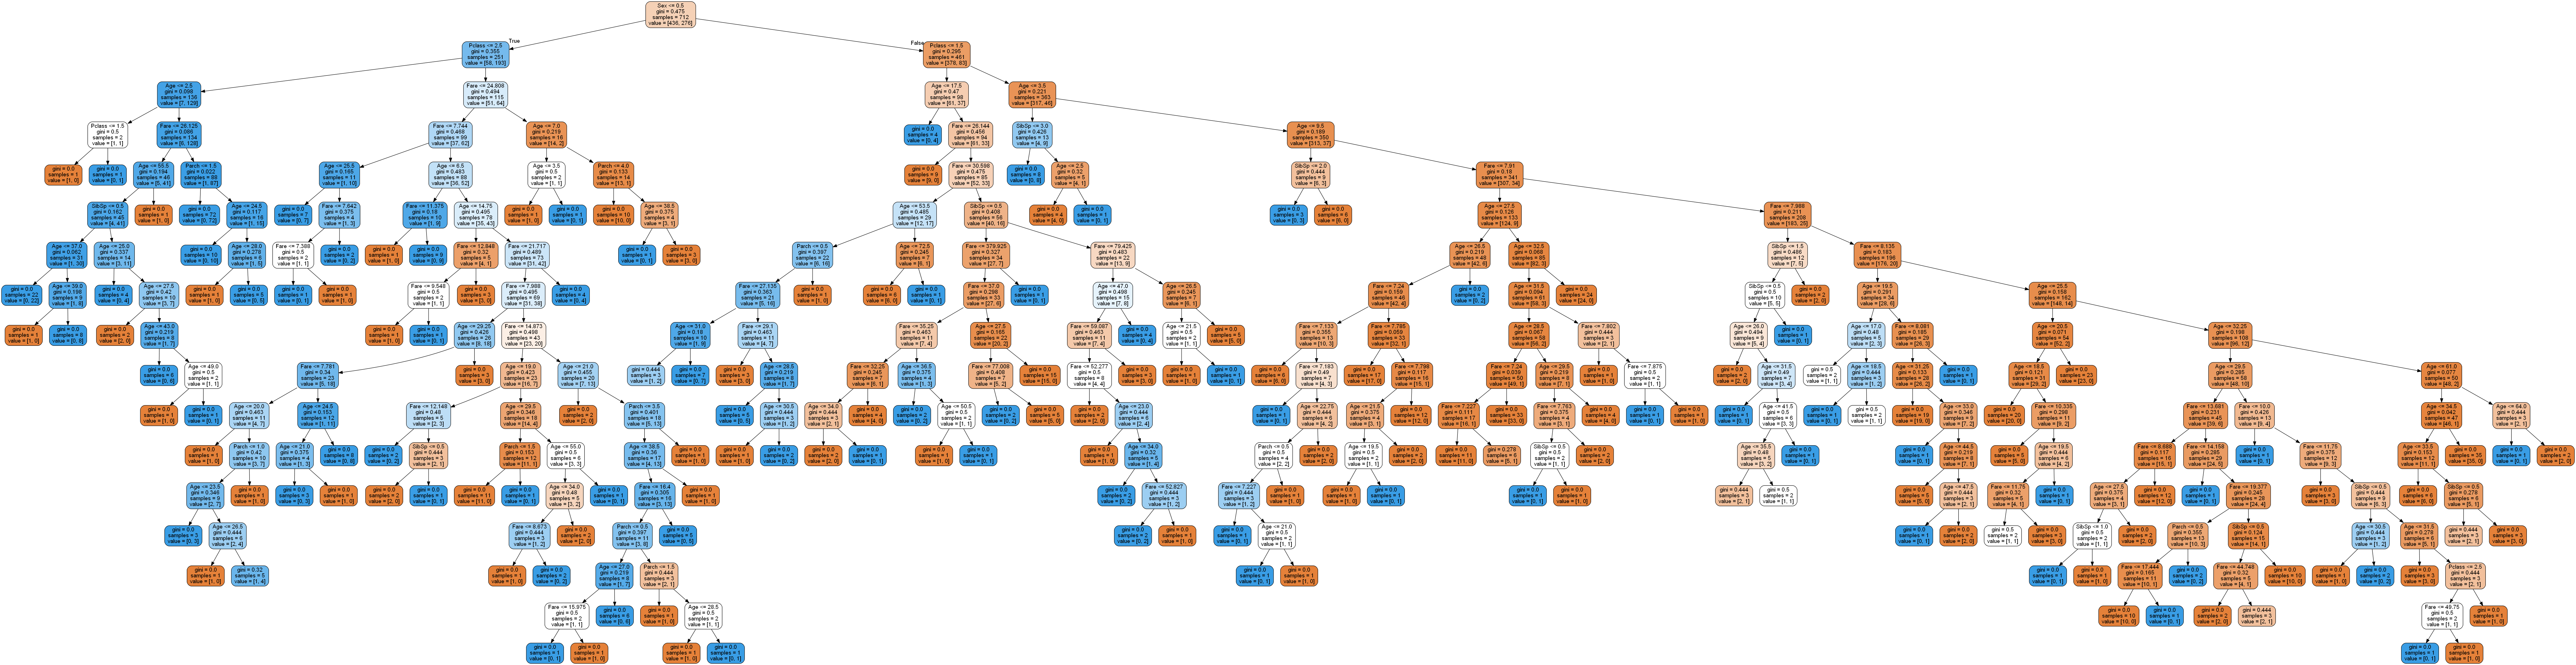

In [46]:
import graphviz
import pydotplus
from IPython.display import Image
# create a dot_file which stores the tree structure
dot_data = export_graphviz(clf,feature_names = list(X.columns),rounded = True,filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png("myTree.png")
# Show graph
Image(graph.create_png())

### Hyperparameter tuning

In [47]:
# Standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=99)
print(X_train.shape)
print(X_test.shape)

(712, 6)
(179, 6)


In [50]:
params = [{'criterion': ['gini', 'entropy'], 
          'max_depth': range(2,32,1),
          'min_samples_leaf': range(1,10,1),
          'min_samples_split': range(2,10,1),
          'splitter': ['best', 'random']}]

In [52]:
from sklearn.model_selection import GridSearchCV
gridsearch = GridSearchCV(estimator=clf, param_grid=params, cv=5, n_jobs=-1)


In [53]:
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 32),
                          'min_samples_leaf': range(1, 10),
                          'min_samples_split': range(2, 10),
                          'splitter': ['best', 'random']}])

In [54]:
best_params = gridsearch.best_params_
best_params

{'criterion': 'gini',
 'max_depth': 18,
 'min_samples_leaf': 1,
 'min_samples_split': 9,
 'splitter': 'random'}

In [55]:
gridsearch.best_score_

0.8398699891657639

In [56]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=18, min_samples_leaf=1, min_samples_split=9, splitter='random')
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=18, min_samples_split=9, splitter='random')

In [57]:
clf.score(X_train,y_train)

0.8764044943820225

In [58]:
clf.score(X_test, y_test)

0.8100558659217877

Great!! using gridsearchcv we have been able to improve the test score

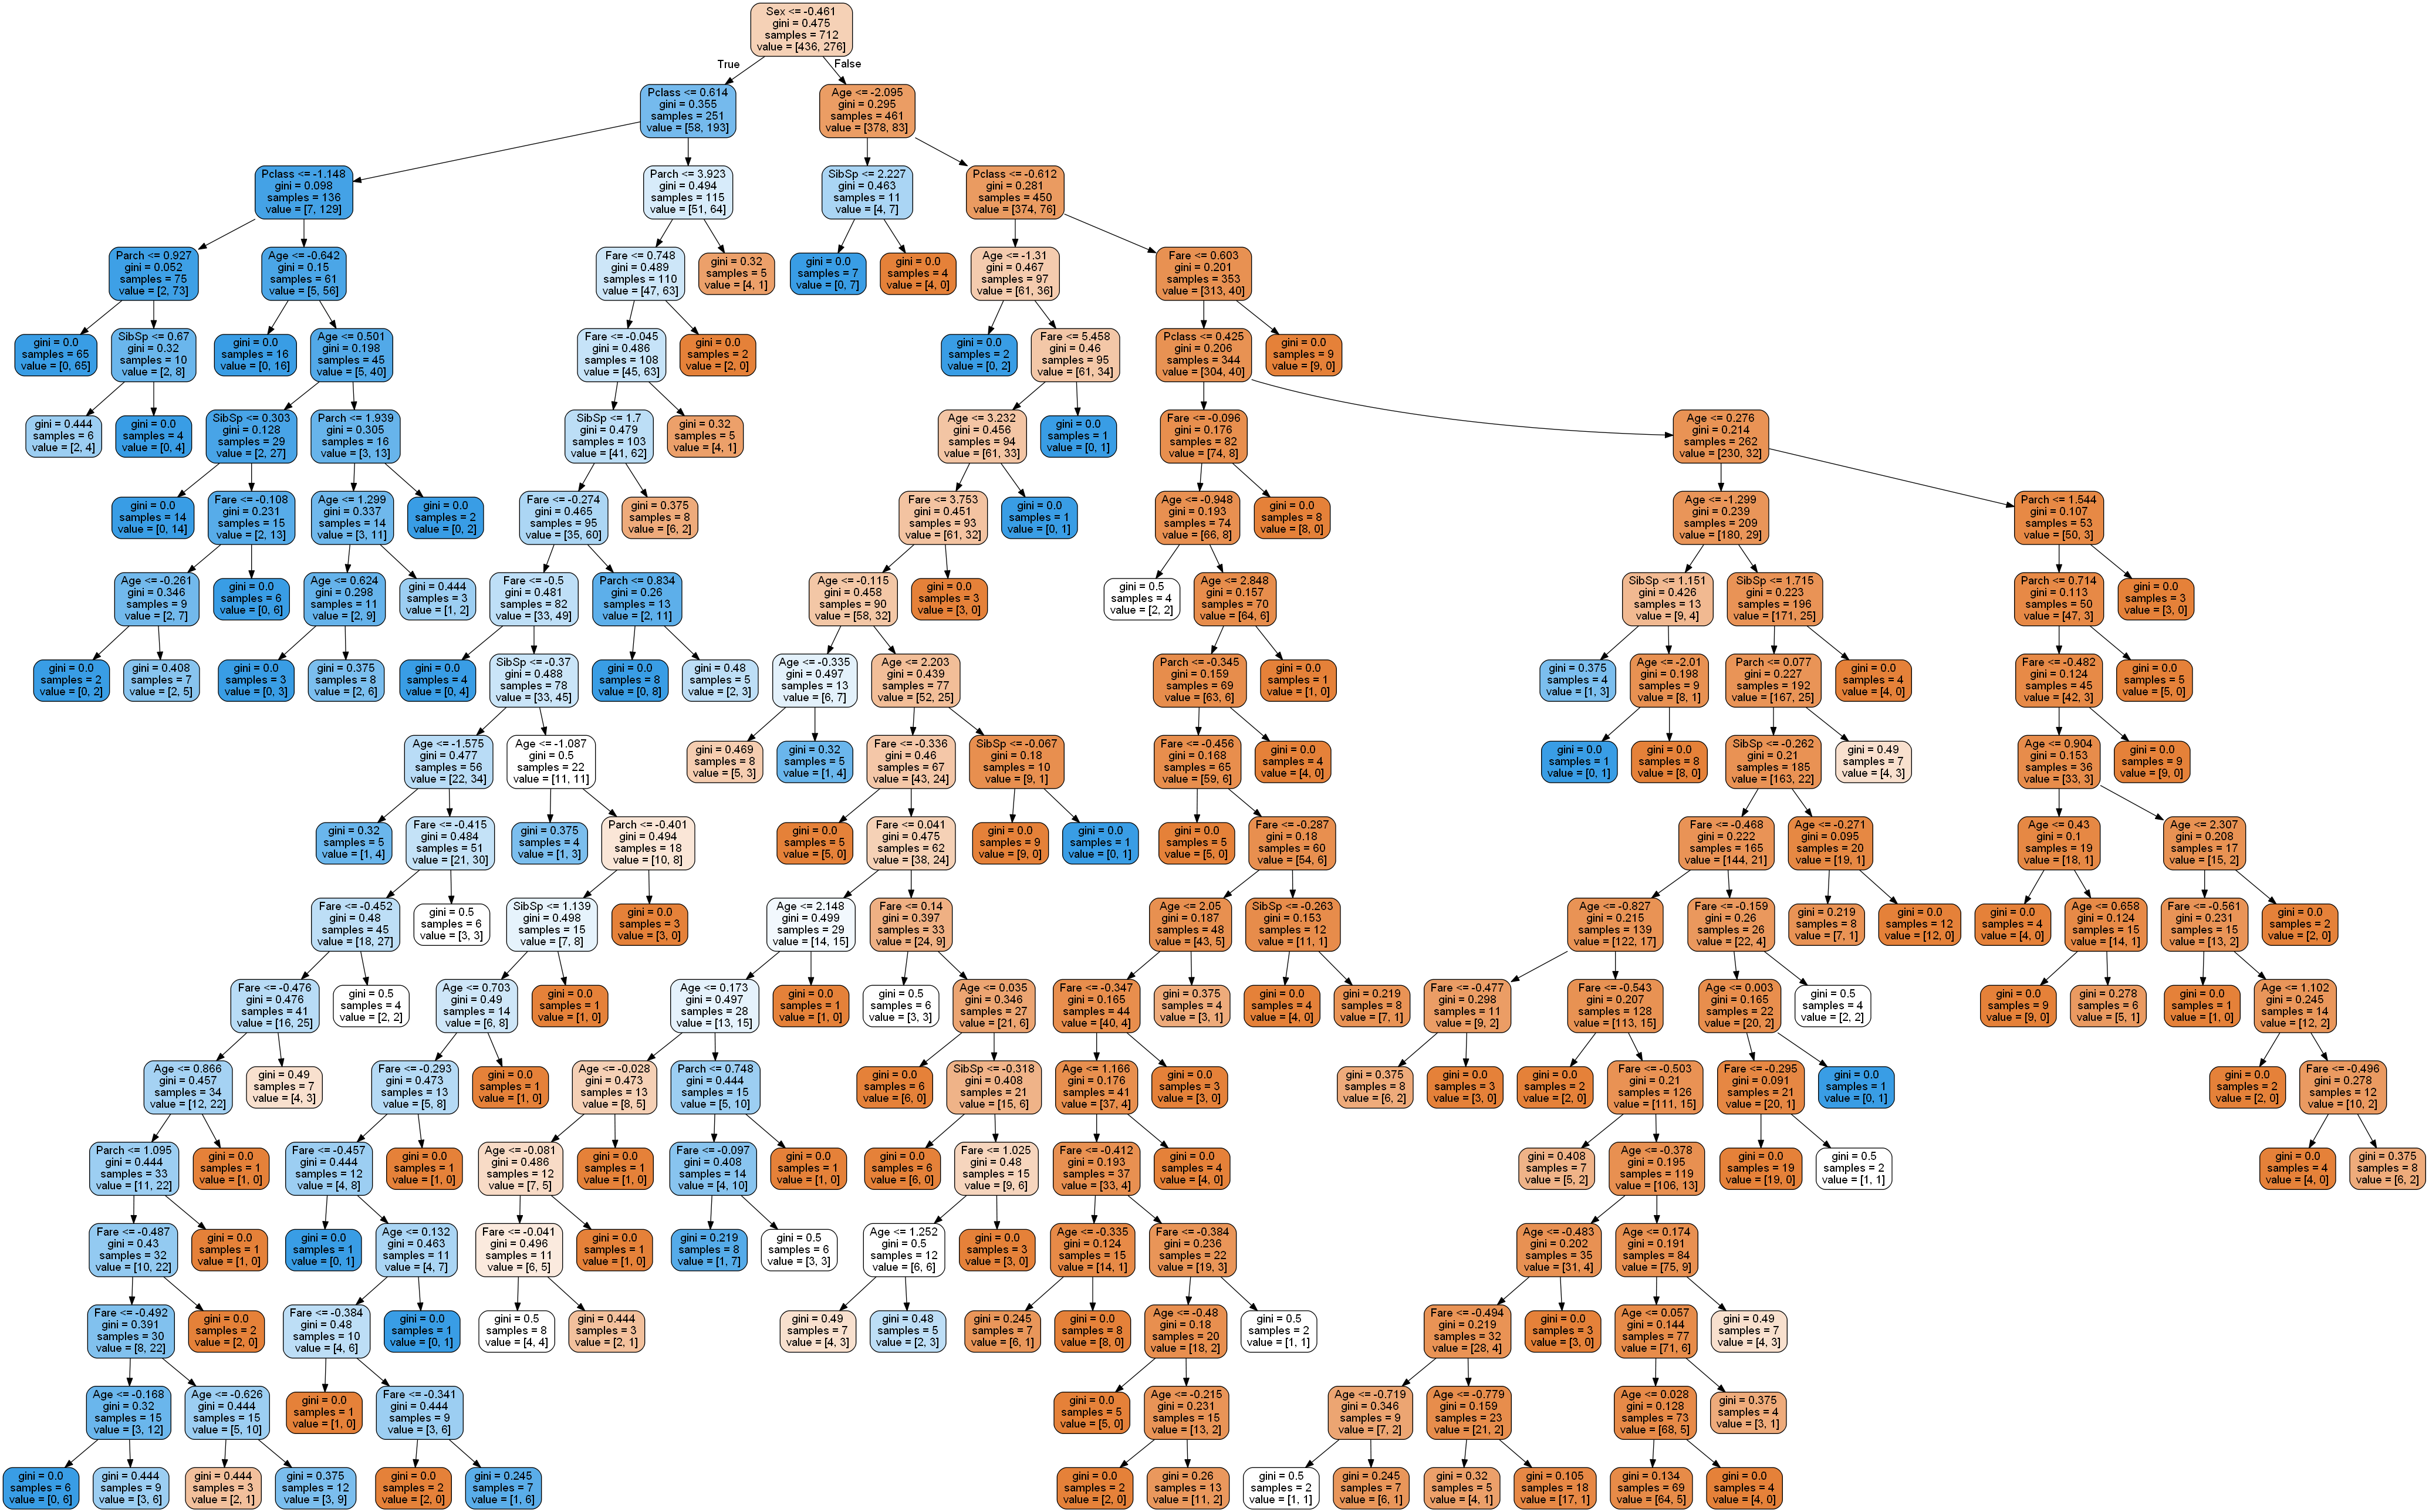

In [59]:
# create a dot_file which stores the tree structure
dot_data = export_graphviz(clf,feature_names = list(X.columns),rounded = True,filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png("myTree.png")
# Show graph
Image(graph.create_png())

In [61]:
# lets save the model
import pickle
with open(r'C:\Users\97156\iNeuron\Data Science and Machine Learning\Assignments\Data Cleaning Assignment'+'\modelForPrediction.sav', 'wb') as f:
    pickle.dump(clf, f)

with open(r'C:\Users\97156\iNeuron\Data Science and Machine Learning\Assignments\Data Cleaning Assignment'+'\standardScaler.sav', 'wb') as f:
    pickle.dump(scaler, f)